In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
seabed = np.load('../data/Penobscot_Seabed.npy')

In [3]:
seabed *= -1

In [4]:
seabed *= -1  # Equivalent to seabed = seabed * -1

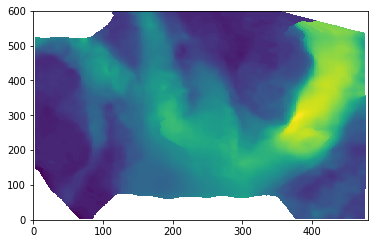

In [5]:
plt.imshow(seabed, aspect=0.5, origin='lower')

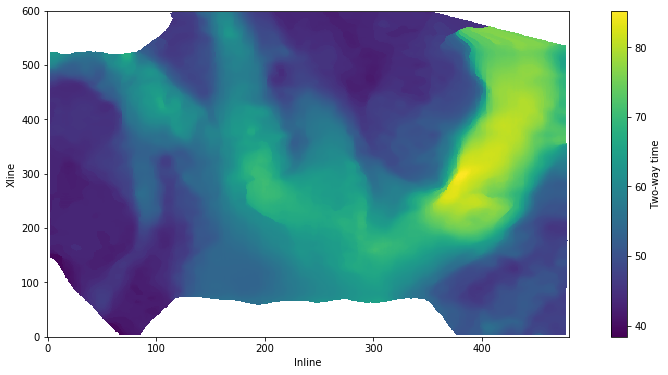

In [6]:
fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot(111)
plt.imshow(seabed, aspect=0.5, origin='lower')
plt.colorbar(label="Two-way time")
ax.set_xlabel("Inline")
ax.set_ylabel("Xline")
plt.show()

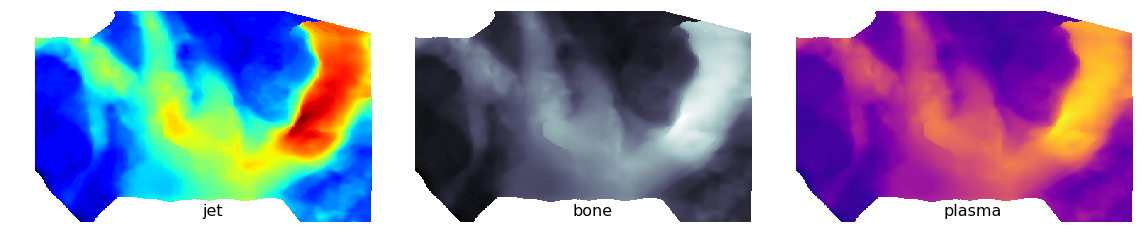

In [7]:
fig = plt.figure(figsize=(16, 4))

cmaps = ['jet', 'bone', 'plasma']
for i, cmap in enumerate(cmaps):
    ax = fig.add_subplot(1, 3, i+1)
    plt.imshow(seabed, aspect=0.5, cmap=cmap, origin='lower')
    ax.axis('off')
    ax.text(253, 22, cmap, ha='center', size=16, color='black')

plt.tight_layout()
plt.show()

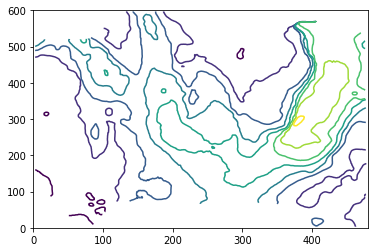

In [8]:
plt.contour(seabed)

In [9]:
mi, ma = np.floor(np.nanmin(seabed)), np.ceil(np.nanmax(seabed))
levels = np.arange(mi, ma+2, 2)  # Add to `ma` to include it explicitly.

In [10]:
levels

array([38., 40., 42., 44., 46., 48., 50., 52., 54., 56., 58., 60., 62.,
       64., 66., 68., 70., 72., 74., 76., 78., 80., 82., 84., 86.])

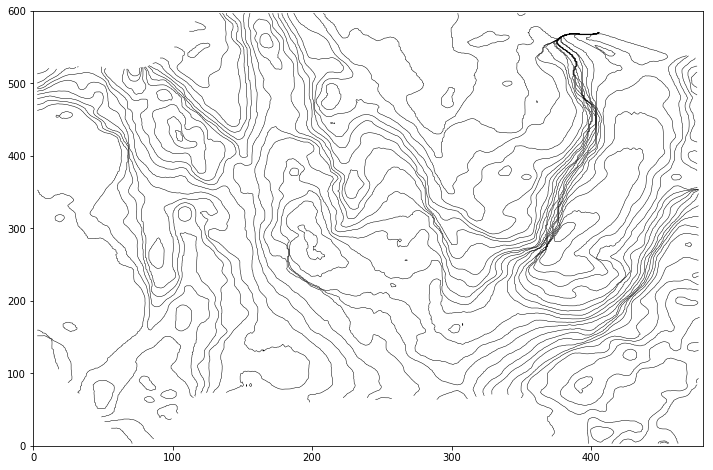

In [11]:
plt.figure(figsize=(12, 8))
plt.contour(seabed, levels=levels, linewidths=0.5, linestyles='solid', colors=['black'])

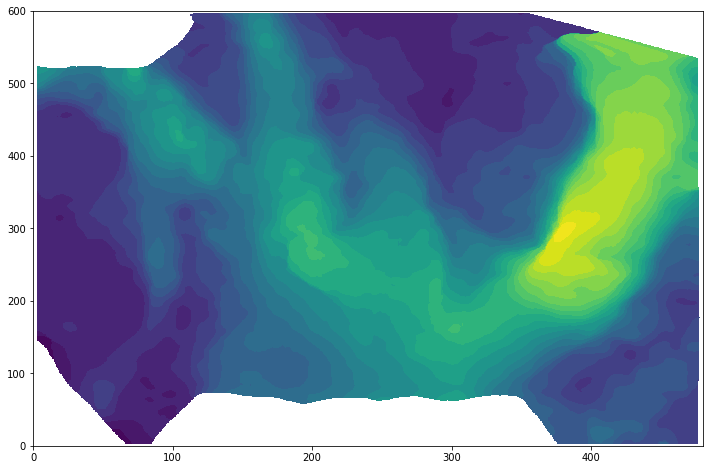

In [12]:
plt.figure(figsize=(12, 8))
plt.contourf(seabed, levels=levels)

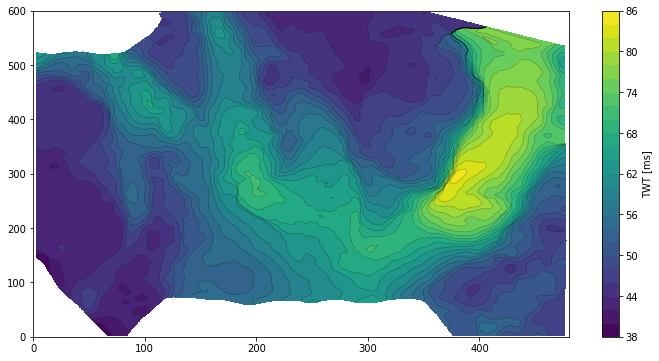

In [13]:
plt.figure(figsize=(12, 6))
plt.contour(seabed, levels=levels, linewidths=0.5, linestyles='solid', colors=['black'], alpha=0.4)
plt.contourf(seabed, levels=levels)
plt.colorbar(label="TWT [ms]")

In [14]:
step = 2
levels = np.arange(10*(mi//10), ma+step, step)  # Add to `ma` to include it explicitly.

In [15]:
lws = [0.5 if l%10 else 1 for l in levels]

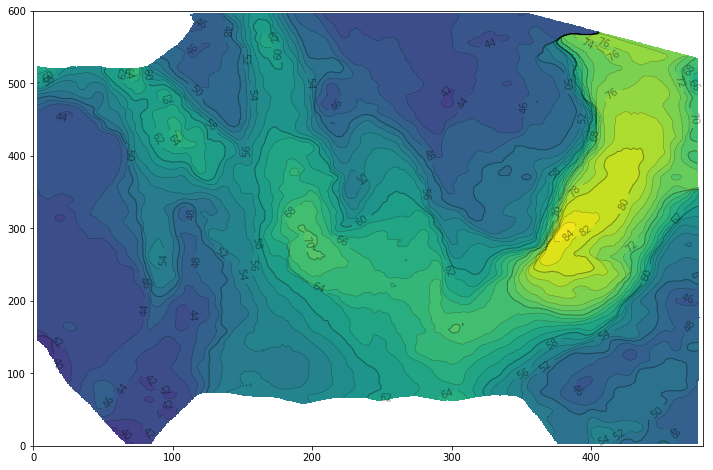

In [16]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1,1,1)
ax.contourf(seabed, levels=levels)
params = dict(linestyles='solid', colors=['black'], alpha=0.4)
cs = ax.contour(seabed, levels=levels, linewidths=lws, **params)
ax.clabel(cs, fmt='%d')
plt.show()


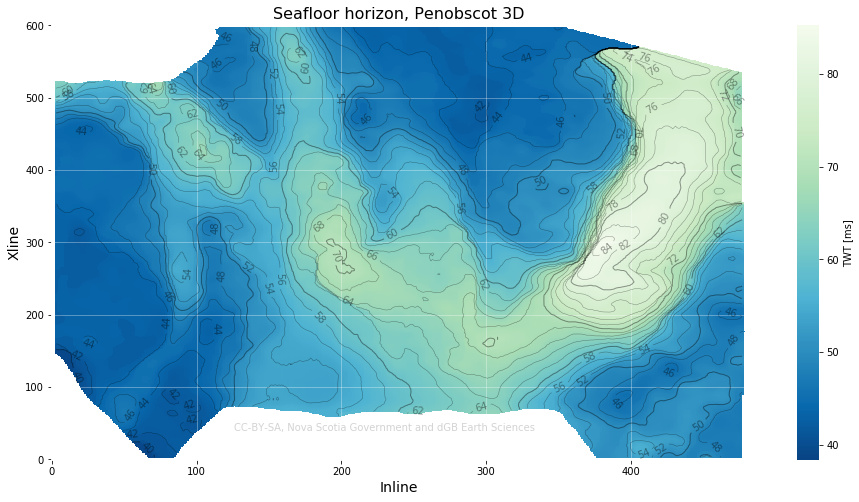

In [17]:
# Set up the figure.
fig = plt.figure(figsize=(18,8), facecolor='white')
ax = fig.add_subplot(111)
ax.set_title("Seafloor horizon, Penobscot 3D", size=16)

# Plot the raster and colourbar.
im = ax.imshow(seabed, cmap='GnBu_r', aspect=0.5, origin='lower')
ax.set_xlabel("Inline", size=14); ax.set_ylabel("Xline", size=14)
cb = plt.colorbar(im, label="TWT [ms]")
cb.set_clim(mi, ma)
cb.outline.set_visible(False)

# Plot the contours.
cs = ax.contour(seabed, levels=levels, linewidths=lws, linestyles='solid', colors=[(0,0,0,0.4)])
ax.clabel(cs, fmt='%d', size=6)

# Finish up.
text = "CC-BY-SA, Nova Scotia Government and dGB Earth Sciences"
ax.text(230, 40, text, ha='center', color='lightgray')
ax.grid(color='w', alpha=0.4)
plt.setp([ax.spines.values()], color='w')
plt.show()